In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("shopping_trends_updated.csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


<AxesSubplot:>

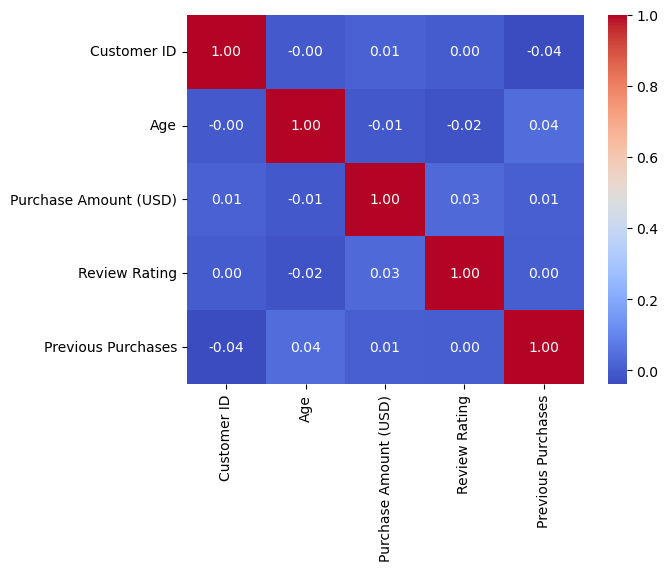

In [7]:
sns.heatmap(df.corr(),  annot=True, cmap='coolwarm', fmt=".2f")

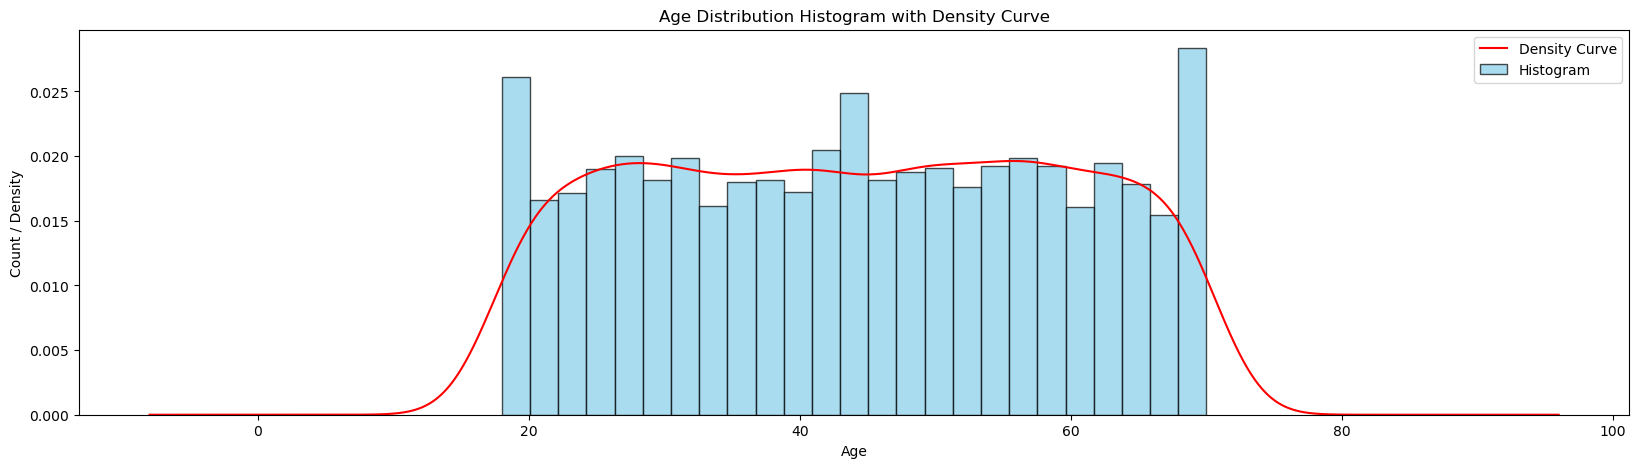

In [8]:
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

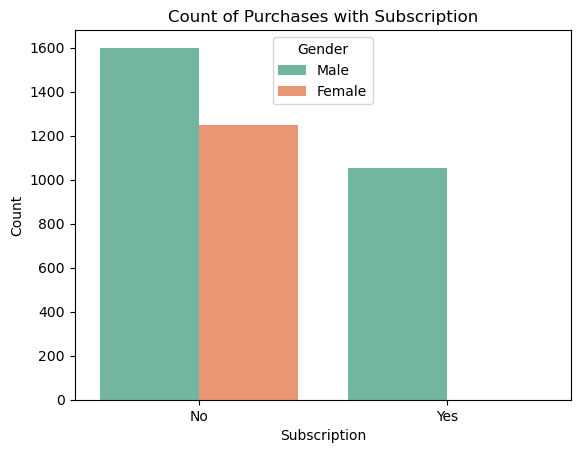

In [11]:
sns.countplot(x ='Subscription Status', data = df,order=df['Subscription Status'].value_counts().index,hue='Gender', palette = "Set2")
plt.title('Count of Purchases with Subscription')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()

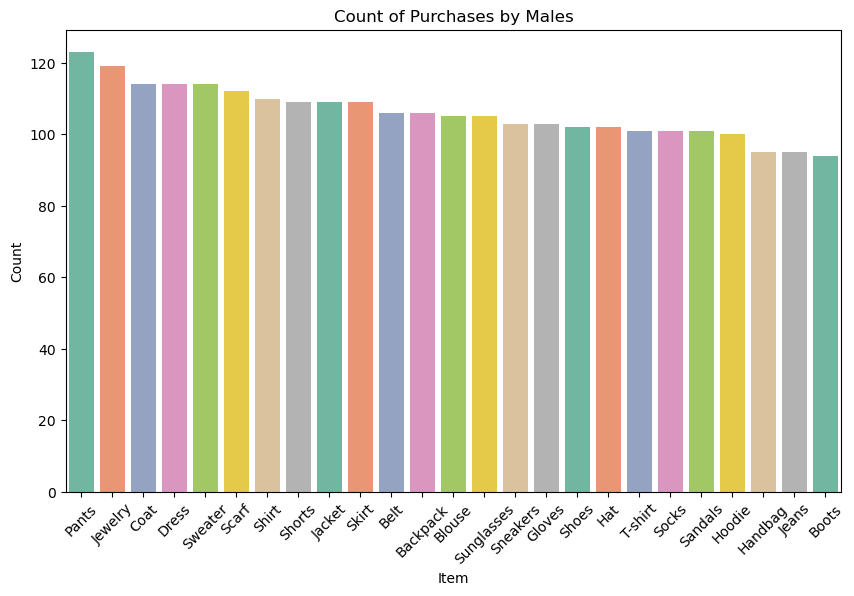

In [11]:
plt.figure(figsize=(10, 6))
df_filtered_males=df[df['Gender'] == 'Male']
sns.countplot(x ='Item Purchased', data = df_filtered_males,order=df_filtered_males['Item Purchased'].value_counts().index, palette = "Set2")
plt.title('Count of Purchases by Males')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

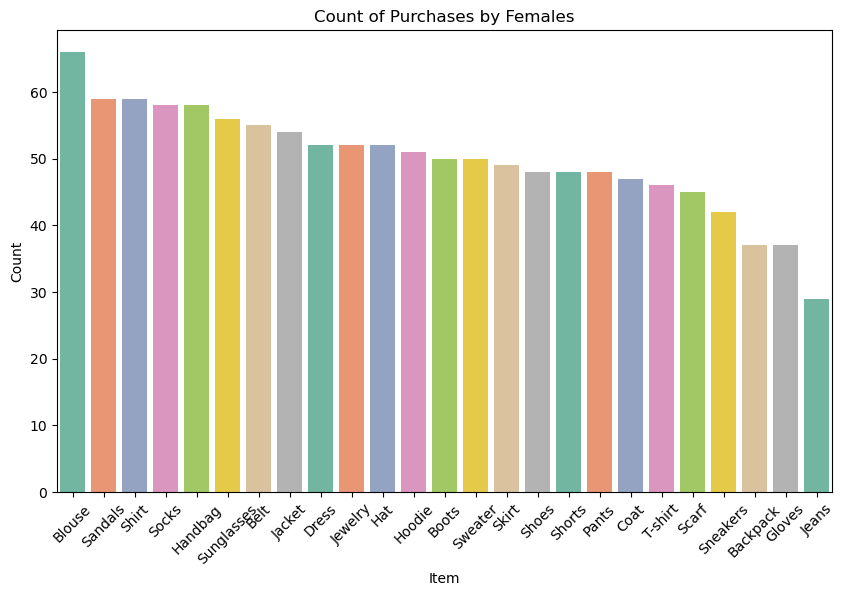

In [10]:
plt.figure(figsize=(10, 6))
df_filtered_females=df[df['Gender'] == 'Female']
sns.countplot(x ='Item Purchased', data = df_filtered_females,order=df_filtered_females['Item Purchased'].value_counts().index, palette = "Set2")
plt.title('Count of Purchases by Females')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
df["Location"].value_counts()

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

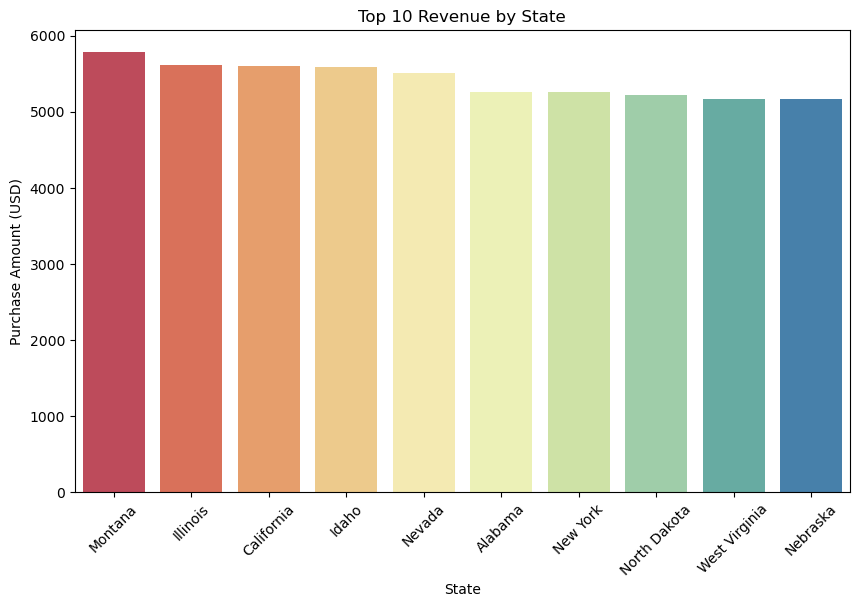

In [14]:
Top10states = df.groupby('Location')["Purchase Amount (USD)"].sum().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=Top10states.index, y=Top10states.values, palette="Spectral")
plt.title('Top 10 Revenue by State')
plt.xlabel('State')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

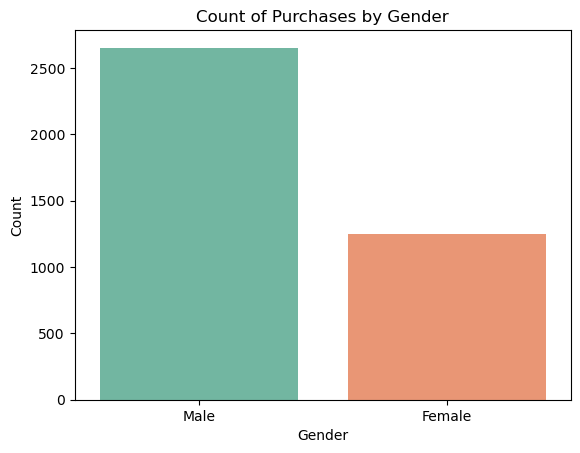

In [8]:
sns.countplot(x ='Gender', data = df,order=df['Gender'].value_counts().index, palette = "Set2")
plt.title('Count of Purchases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

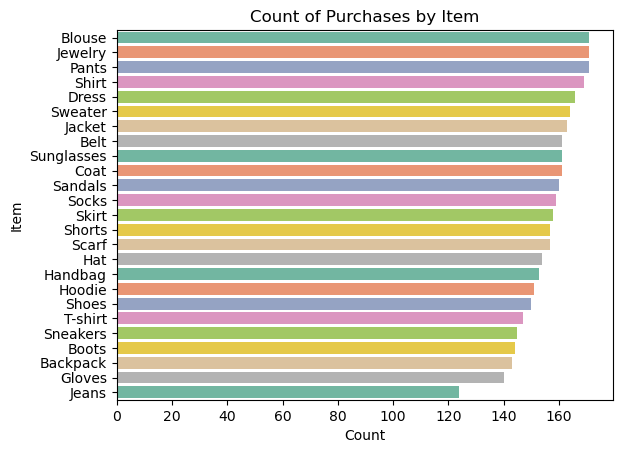

In [10]:
sns.countplot(y ='Item Purchased', data = df,order=df['Item Purchased'].value_counts().index, palette = "Set2")
plt.title('Count of Purchases by Item')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

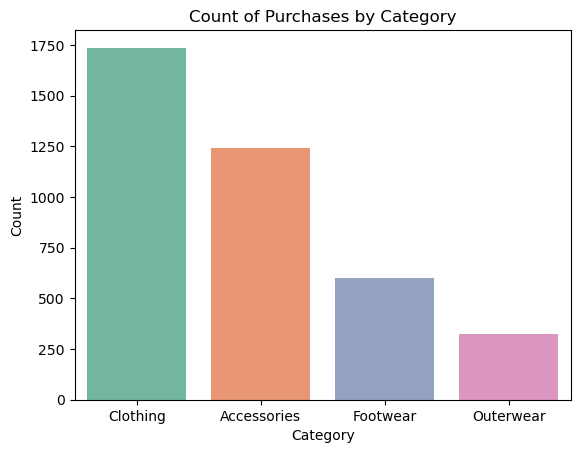

In [11]:
sns.countplot(x ='Category', data = df,order=df['Category'].value_counts().index, palette = "Set2")
plt.title('Count of Purchases by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

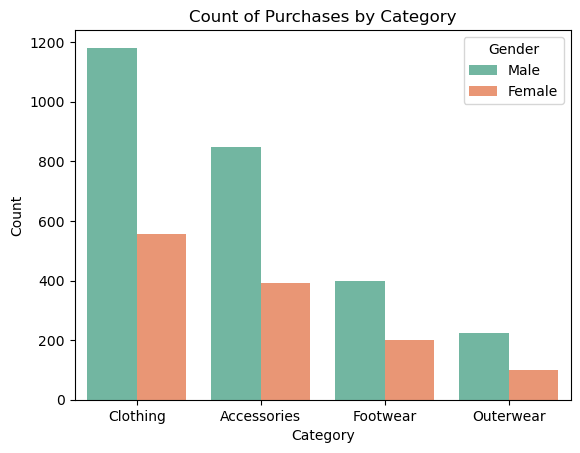

In [14]:
sns.countplot(x ='Category', data = df,order=df['Category'].value_counts().index, hue='Gender', palette = "Set2")
plt.title('Count of Purchases by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

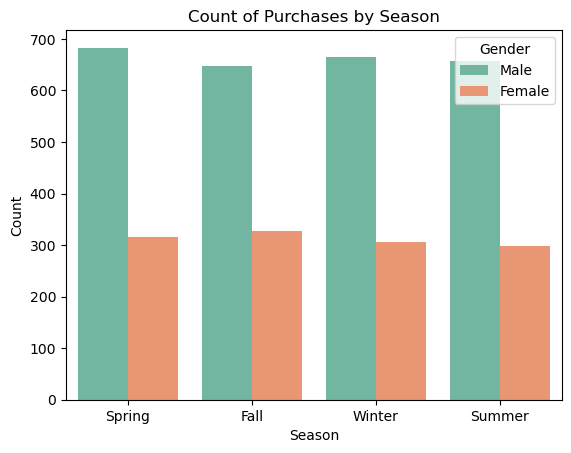

In [31]:
sns.countplot(x ='Season', data = df,order=df['Season'].value_counts().index, hue='Gender', palette = "Set2")
plt.title('Count of Purchases by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

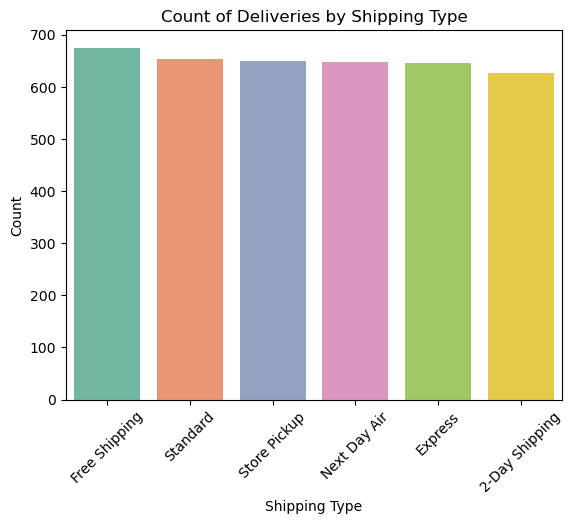

In [16]:
sns.countplot(x ='Shipping Type', data = df,order=df['Shipping Type'].value_counts().index, palette = "Set2")
plt.title('Count of Deliveries by Shipping Type')
plt.xlabel('Shipping Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

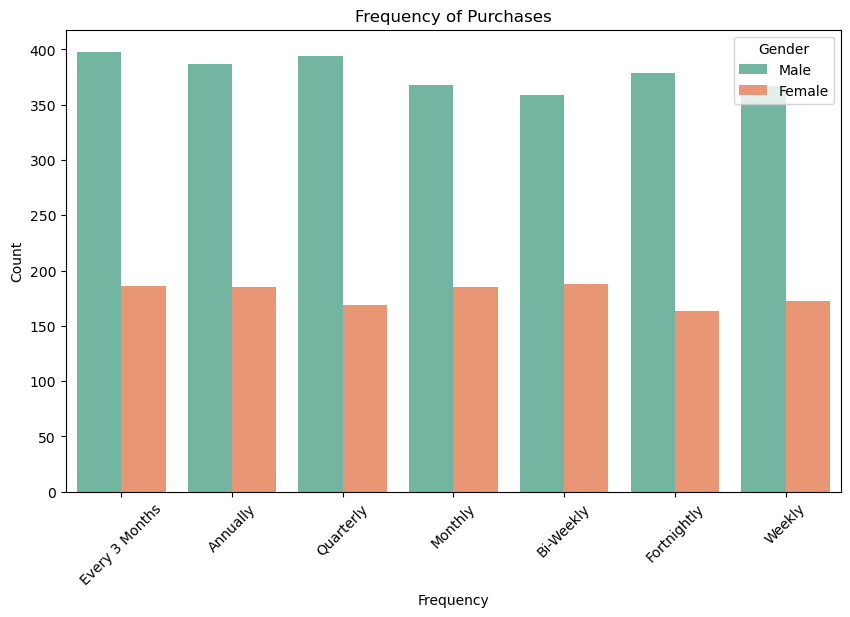

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x ='Frequency of Purchases', data = df,order=df['Frequency of Purchases'].value_counts().index, hue='Gender', palette = "Set2")
plt.title('Frequency of Purchases')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

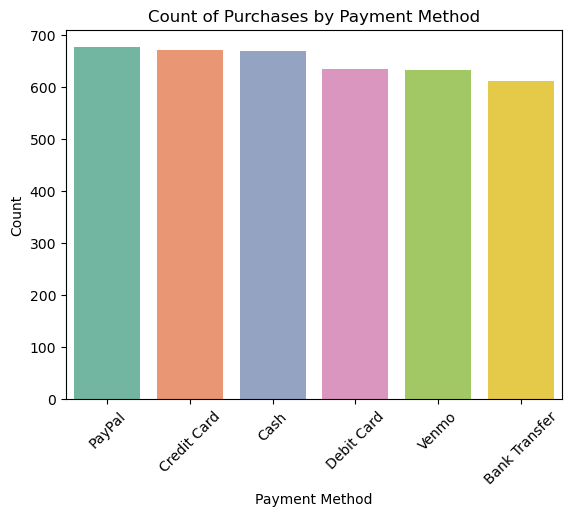

In [24]:
sns.countplot(x ='Payment Method', data = df,order=df['Payment Method'].value_counts().index, palette = "Set2")
plt.title('Count of Purchases by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

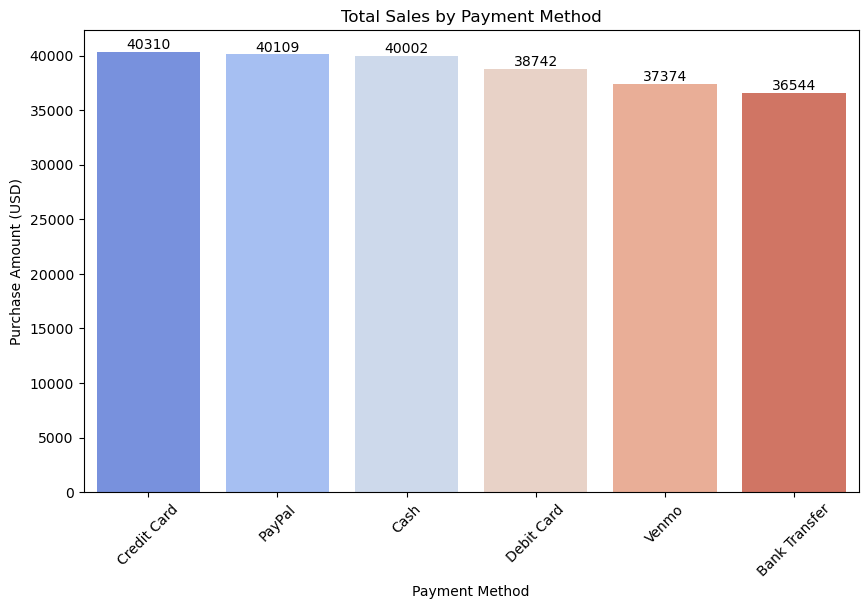

In [13]:
Revenuebypaymentmode = df.groupby('Payment Method')["Purchase Amount (USD)"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=Revenuebypaymentmode.index, y=Revenuebypaymentmode.values, palette='coolwarm')
ax.bar_label(ax.containers[0])
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

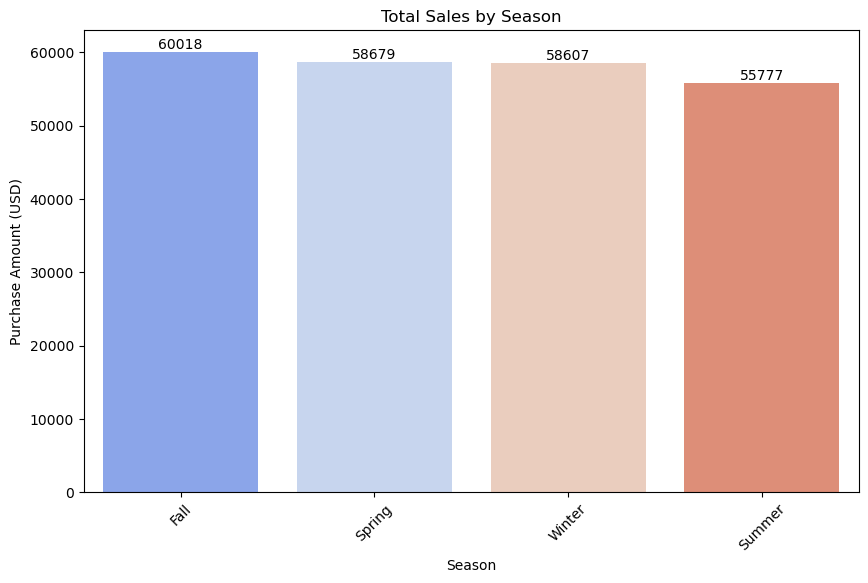

In [14]:
Revenuebyseason = df.groupby('Season')["Purchase Amount (USD)"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
ax=sns.barplot(x=Revenuebyseason.index, y=Revenuebyseason.values, palette='coolwarm')
ax.bar_label(ax.containers[0])
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Purchase Amount (USD)'>

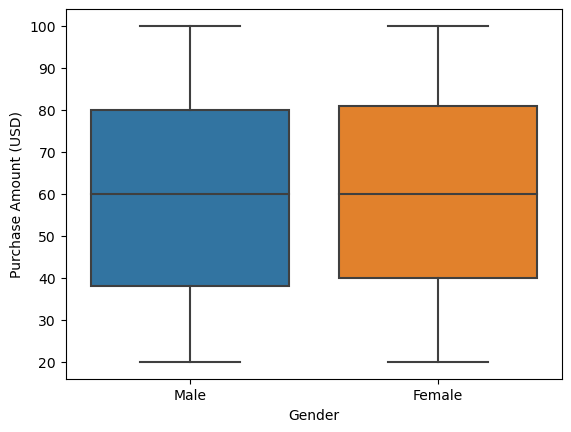

In [33]:
sns.boxplot(data=df, x="Gender", y="Purchase Amount (USD)")

<AxesSubplot:xlabel='Category', ylabel='Review Rating'>

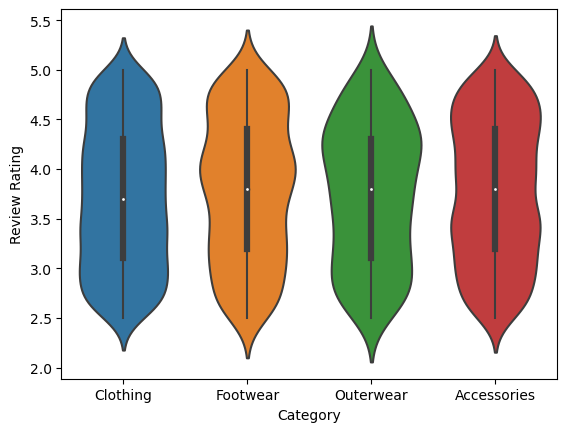

In [52]:
sns.violinplot(data=df, x="Category", y="Review Rating")

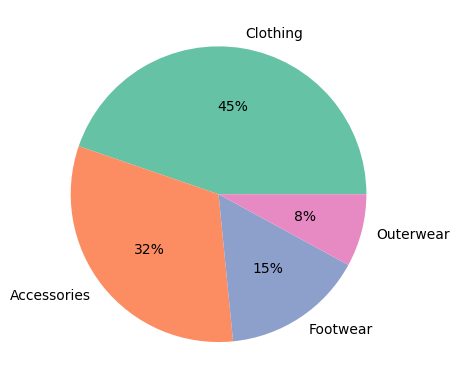

In [36]:
Revenuebycategory = df.groupby('Category')["Purchase Amount (USD)"].sum().sort_values(ascending=False)
plt.pie(Revenuebycategory, labels=Revenuebycategory.index , colors=sns.color_palette('Set2') , autopct='%.0f%%') 
plt.show() 

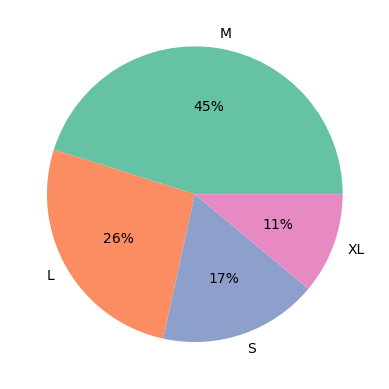

In [88]:
Salesbysize = df.groupby('Size')["Purchase Amount (USD)"].sum().sort_values(ascending=False)
plt.pie(Salesbysize, labels=Salesbysize.index , colors=sns.color_palette('Set2') , autopct='%.0f%%') 
plt.show() 

In [61]:
grouped_counts = df.groupby(['Season','Item Purchased'])['Item Purchased'].count()
print(grouped_counts.to_string())

Season  Item Purchased
Fall    Backpack          34
        Belt              41
        Blouse            42
        Boots             35
        Coat              34
        Dress             36
        Gloves            37
        Handbag           48
        Hat               50
        Hoodie            36
        Jacket            54
        Jeans             32
        Jewelry           35
        Pants             38
        Sandals           44
        Scarf             40
        Shirt             39
        Shoes             26
        Shorts            35
        Skirt             46
        Sneakers          31
        Socks             42
        Sunglasses        39
        Sweater           42
        T-shirt           39
Spring  Backpack          39
        Belt              41
        Blouse            46
        Boots             40
        Coat              46
        Dress             43
        Gloves            42
        Handbag           36
        Hat         

In [78]:
average_rating = df.groupby(['Item Purchased'])['Review Rating'].mean()
print(average_rating.round(2).to_string())

Item Purchased
Backpack      3.75
Belt          3.76
Blouse        3.68
Boots         3.81
Coat          3.73
Dress         3.75
Gloves        3.86
Handbag       3.78
Hat           3.81
Hoodie        3.72
Jacket        3.76
Jeans         3.65
Jewelry       3.76
Pants         3.72
Sandals       3.84
Scarf         3.70
Shirt         3.63
Shoes         3.75
Shorts        3.71
Skirt         3.78
Sneakers      3.76
Socks         3.75
Sunglasses    3.74
Sweater       3.77
T-shirt       3.78


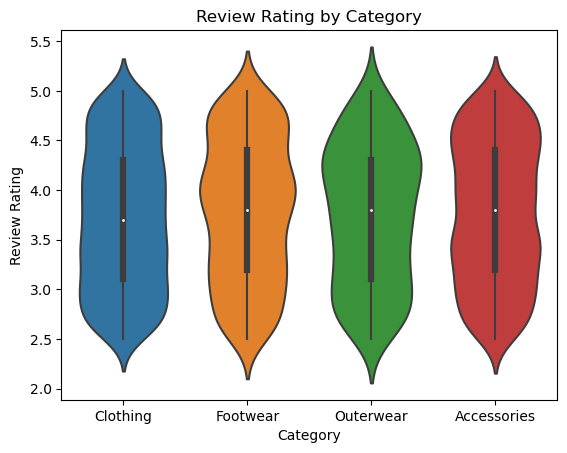

In [79]:
sns.violinplot(x='Category', y='Review Rating', data=df)
plt.title('Review Rating by Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.show()

In [80]:
subscription_promo_count = df[(df['Subscription Status'] == 'Yes') & (df['Promo Code Used'] == 'Yes')]['Customer ID'].count()
print("Number of Customers with Subscription and Promo Code Used: ", subscription_promo_count)

Number of Customers with Subscription and Promo Code Used:  1053


In [87]:
avg_age_accessories_discount = df[(df['Category'] == 'Accessories') & (df['Discount Applied'] == 'Yes')]['Age'].mean()
print("Average Age of Customers who purchased Accessories with Discount Applied:", avg_age_accessories_discount)

Average Age of Customers who purchased Accessories with Discount Applied: 44.23941068139963


In [89]:
common_item_high_rating_louisiana = df[(df['Location'] == 'Louisiana') & (df['Review Rating'] >= 4)]['Item Purchased'].mode()[0]
print("Most Common Item Purchased by High-Rating Customers in Louisiana:", common_item_high_rating_louisiana)

Most Common Item Purchased by High-Rating Customers in Louisiana: Sweater


In [90]:
avg_purchase_subscription_venmo_no_promo = df[(df['Subscription Status'] == 'Yes') & (df['Payment Method'] == 'Venmo') & (df['Promo Code Used'] == 'No')]['Purchase Amount (USD)'].mean()
print("Average Purchase Amount for Customers with Subscription, Venmo Payment, and No Promo Code:", avg_purchase_subscription_venmo_no_promo)

Average Purchase Amount for Customers with Subscription, Venmo Payment, and No Promo Code: nan


In [91]:
total_purchase_fall_credit_card = df[(df['Season'] == 'Fall') & (df['Payment Method'] == 'Credit Card')]['Purchase Amount (USD)'].sum()
print("Total Purchase Amount for Fall Season Purchases with Credit Card Payment Method:", total_purchase_fall_credit_card)

Total Purchase Amount for Fall Season Purchases with Credit Card Payment Method: 9905


In [99]:
filtered_df = round(df[df['Review Rating'] >= 4.0]['Purchase Amount (USD)'].mean(),2)
print("Mean purchase amount when ratings are at least 4.0:", filtered_df)

Mean purchase amount when ratings are at least 4.0: 60.59


In [124]:
total_purchase_above_40_previous = round(df[df['Previous Purchases'] > 40]['Purchase Amount (USD)'].mean(),2)
print("Total Purchase Amount for Customers with more than 40 Previous Purchases:", total_purchase_above_40_previous)

Total Purchase Amount for Customers with more than 40 Previous Purchases: 60.9


<AxesSubplot:xlabel='Category', ylabel='Review Rating'>

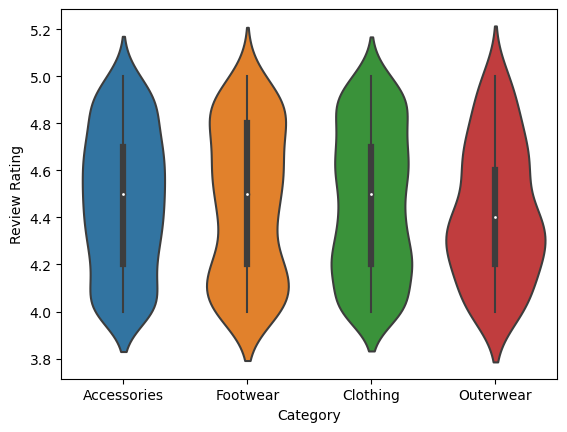

In [108]:
sns.violinplot(x='Category', y='Review Rating', data=df[df['Review Rating'] >= 4.0])

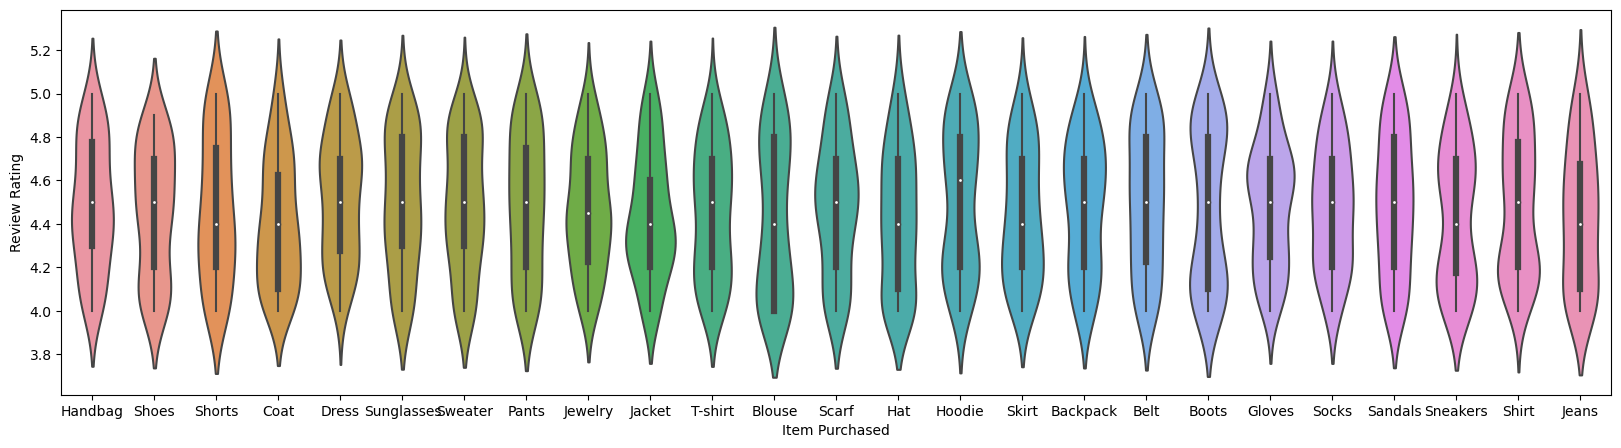

In [113]:
plt.figure(figsize=(20, 5))
sns.violinplot(x='Item Purchased', y='Review Rating', data=df[df['Review Rating'] >= 4.0]) 
plt.show()

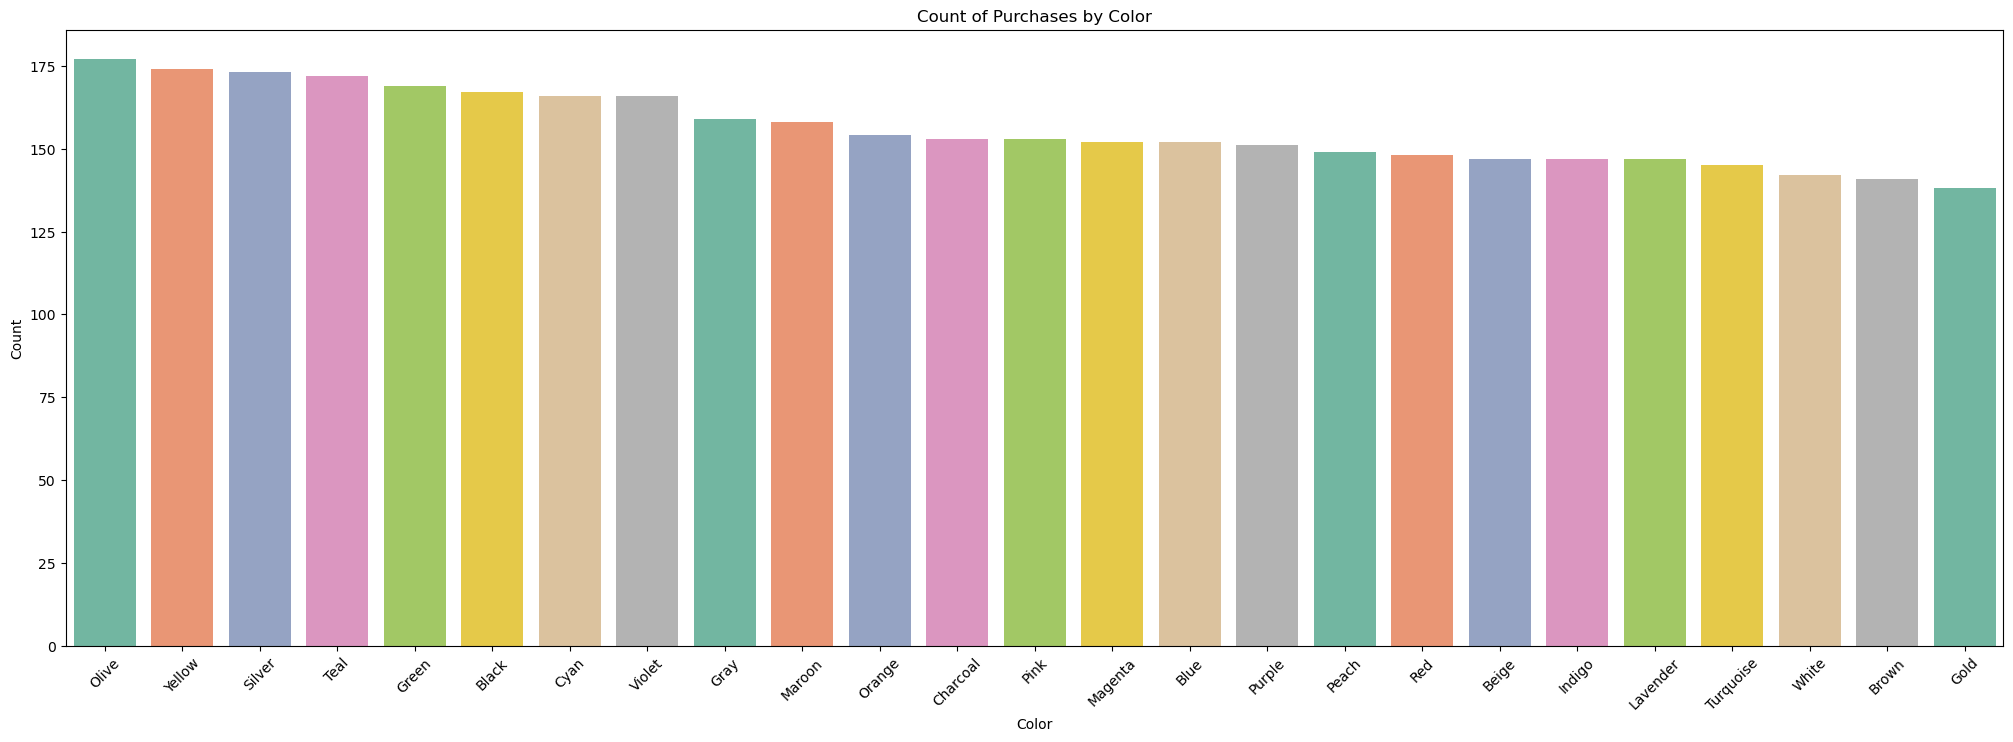

In [119]:
plt.figure(figsize=(25, 8))
sns.countplot(x ='Color', data = df,order=df['Color'].value_counts().index, palette = "Set2")
plt.title('Count of Purchases by Color')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

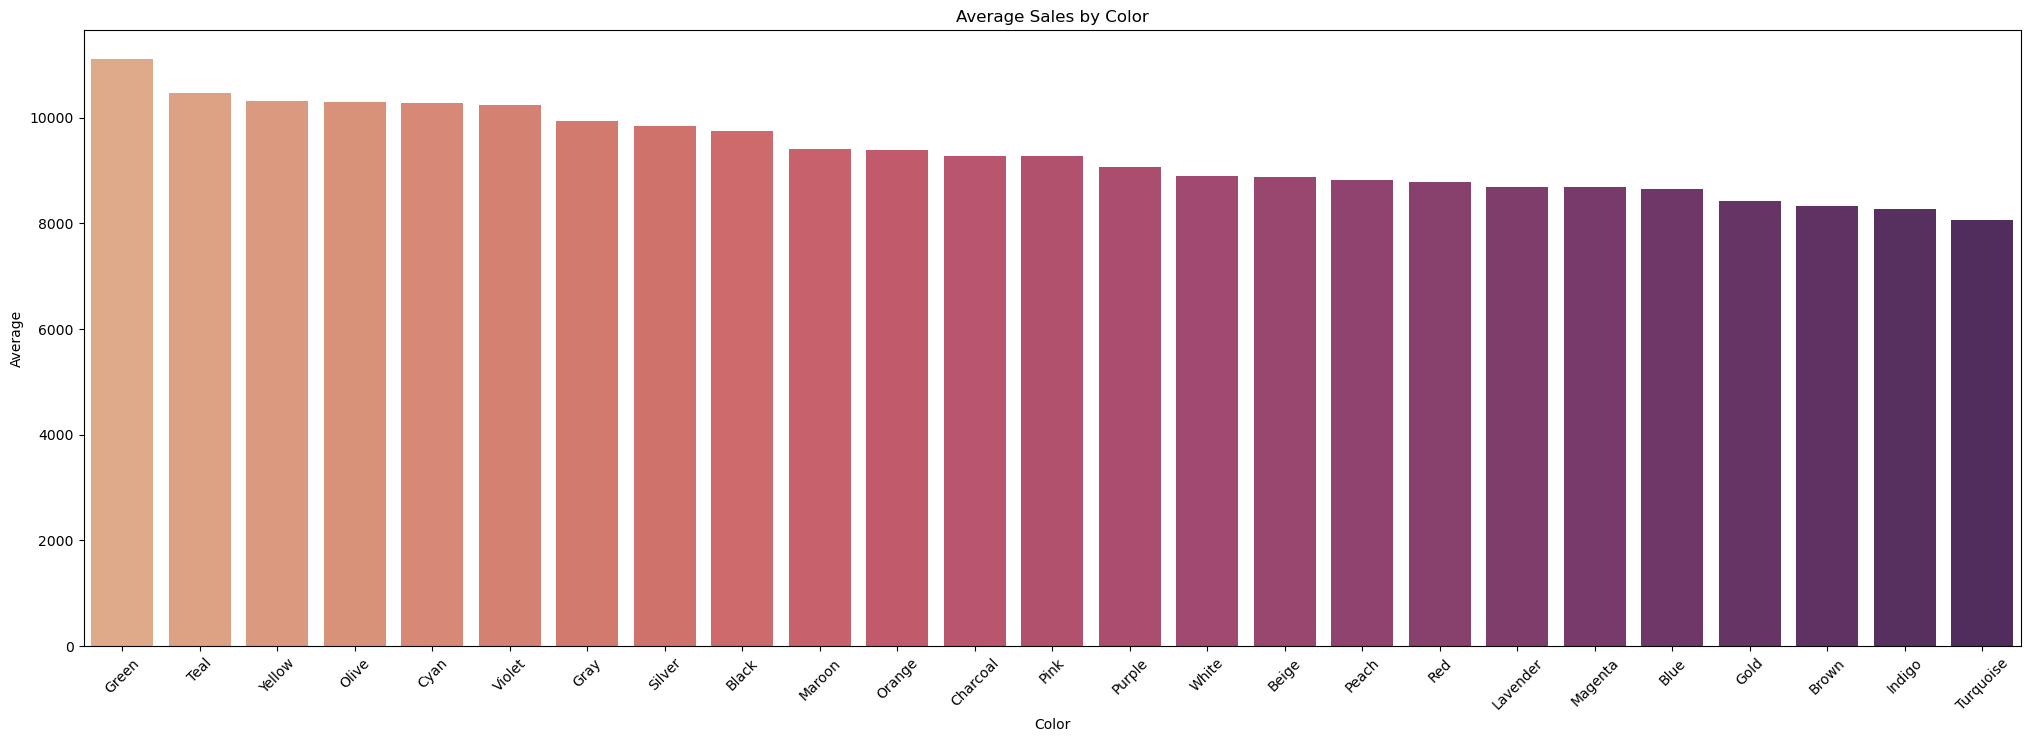

In [12]:
Sales_by_color = df.groupby('Color')["Purchase Amount (USD)"].sum().sort_values(ascending=False)
plt.figure(figsize=(25, 8))
sns.barplot(x =Sales_by_color.index, y=Sales_by_color.values, palette="flare")
plt.title('Average Sales by Color')
plt.xlabel('Color')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()

1. There are no female subscribers
2. Males purchased pants the most whereas females purchased blouses the most.
3. Montana recorded highest purchases and also generated highest revenue.
4. Credit card payment method generated highest sales.
5. Fall season generated highest sales.
7. 50% of Hoodie purchases have higher rating. Glove ratings are skewed and rated highly positive.